# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [568]:
import pandas as pd
import numpy as np

# read in data
bicycle_data = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
bicycle_data.head()

,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [569]:
test_data = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
test_data.head()

,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [570]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2)
weather_rawdata.head()

,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),is_day ()
0,2023-01-01T00:00,15.8,9.3,0.0,3.0,86.0,0
1,2023-01-01T01:00,15.3,8.9,0.0,3.0,80.0,0
2,2023-01-01T02:00,14.7,8.8,0.0,2.0,70.0,0
3,2023-01-01T03:00,14.3,9.0,0.0,3.0,99.0,0
4,2023-01-01T04:00,13.8,9.3,0.0,2.0,70.0,0


The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [571]:
import datetime
import holidays

weather_data = weather_rawdata.copy()
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data['Weekday'] = date_time.dt.strftime('%A')
weather_data['Hour'] = date_time.dt.hour
weather_data['Working_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
weather_data['Weekend'] = weather_data['Weekday'].isin(["Saturday", "Sunday"])
belgian_holidays = holidays.Belgium(years=2023)
weather_data['Holiday'] = date_time.dt.date.isin(belgian_holidays)

weather_data.columns = weather_data.columns.str.split(' ').str[0]

weather_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,Weekend,Holiday
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,True,True
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,True,True
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,True,True
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,True,True
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,True,True


In [572]:
dummies = pd.get_dummies(weather_data.Weekday)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [573]:
weather_data = pd.concat([weather_data, dummies], axis=1)
weather_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,Weekend,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,True,True,0,0,0,1,0,0,0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,True,True,0,0,0,1,0,0,0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,True,True,0,0,0,1,0,0,0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,True,True,0,0,0,1,0,0,0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,True,True,0,0,0,1,0,0,0


The following code merges the bicycle data with the weather data to get a train set:

In [574]:
train_data = weather_data.merge(bicycle_data, on = "Date_hour")
train_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,Weekend,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,True,True,0,0,0,1,0,0,0,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,True,True,0,0,0,1,0,0,0,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,True,True,0,0,0,1,0,0,0,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,True,True,0,0,0,1,0,0,0,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,True,True,0,0,0,1,0,0,0,155.0


The following does the same but then for the test set:

In [575]:
test_data = weather_data.merge(test_data, on = "Date_hour")
test_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,Weekend,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Id
0,18.0,15.7,0.0,3.0,100.0,0,2023-07-01T00,Saturday,0,0,True,False,0,0,1,0,0,0,0,0
1,17.7,15.3,0.0,3.0,100.0,0,2023-07-01T01,Saturday,1,0,True,False,0,0,1,0,0,0,0,1
2,17.4,15.0,0.0,3.0,100.0,0,2023-07-01T02,Saturday,2,0,True,False,0,0,1,0,0,0,0,2
3,17.2,15.0,0.0,3.0,100.0,0,2023-07-01T03,Saturday,3,0,True,False,0,0,1,0,0,0,0,3
4,17.1,15.3,0.0,3.0,100.0,1,2023-07-01T04,Saturday,4,0,True,False,0,0,1,0,0,0,0,4


In [576]:
ground_truth = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")
ground_truth.head()

,﻿Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2023-01-01,0:00:00,2023-01-01T00:00:00+01:00,7.0,4.0,3.0
1,COU,Coupure-Links,2023-01-01,0:05:00,2023-01-01T00:05:00+01:00,2.0,0.0,2.0
2,COU,Coupure-Links,2023-01-01,0:10:00,2023-01-01T00:10:00+01:00,1.0,0.0,1.0
3,COU,Coupure-Links,2023-01-01,0:15:00,2023-01-01T00:15:00+01:00,8.0,4.0,4.0
4,COU,Coupure-Links,2023-01-01,0:20:00,2023-01-01T00:20:00+01:00,5.0,2.0,3.0


In [577]:
gold_data = ground_truth.copy()
gold_data["Date_hour"] = ground_truth['Ordening'].str.extract(r'^(.*?T\d{2})..')
gold_data = gold_data.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
gold_data = weather_data.merge(gold_data, on = "Date_hour")
gold_data.head()
#gold_data.isnull().sum()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,...,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Datum,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,True,0,0,0,1,0,0,0,2023-01-01,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,True,0,0,0,1,0,0,0,2023-01-01,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,True,0,0,0,1,0,0,0,2023-01-01,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,True,0,0,0,1,0,0,0,2023-01-01,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,True,0,0,0,1,0,0,0,2023-01-01,155.0


In [578]:
gtest_data = gold_data[(gold_data['Datum'] >= '2023-07-01') & (gold_data['Datum'] <= '2023-07-31')]
gtest_data.head()
print(gtest_data.shape)

(744, 21)


## Models

### Preprocessing

['temperature_2m', 'precipitation', 'is_day', 'Weekend', 'Hour', 'Holiday']


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


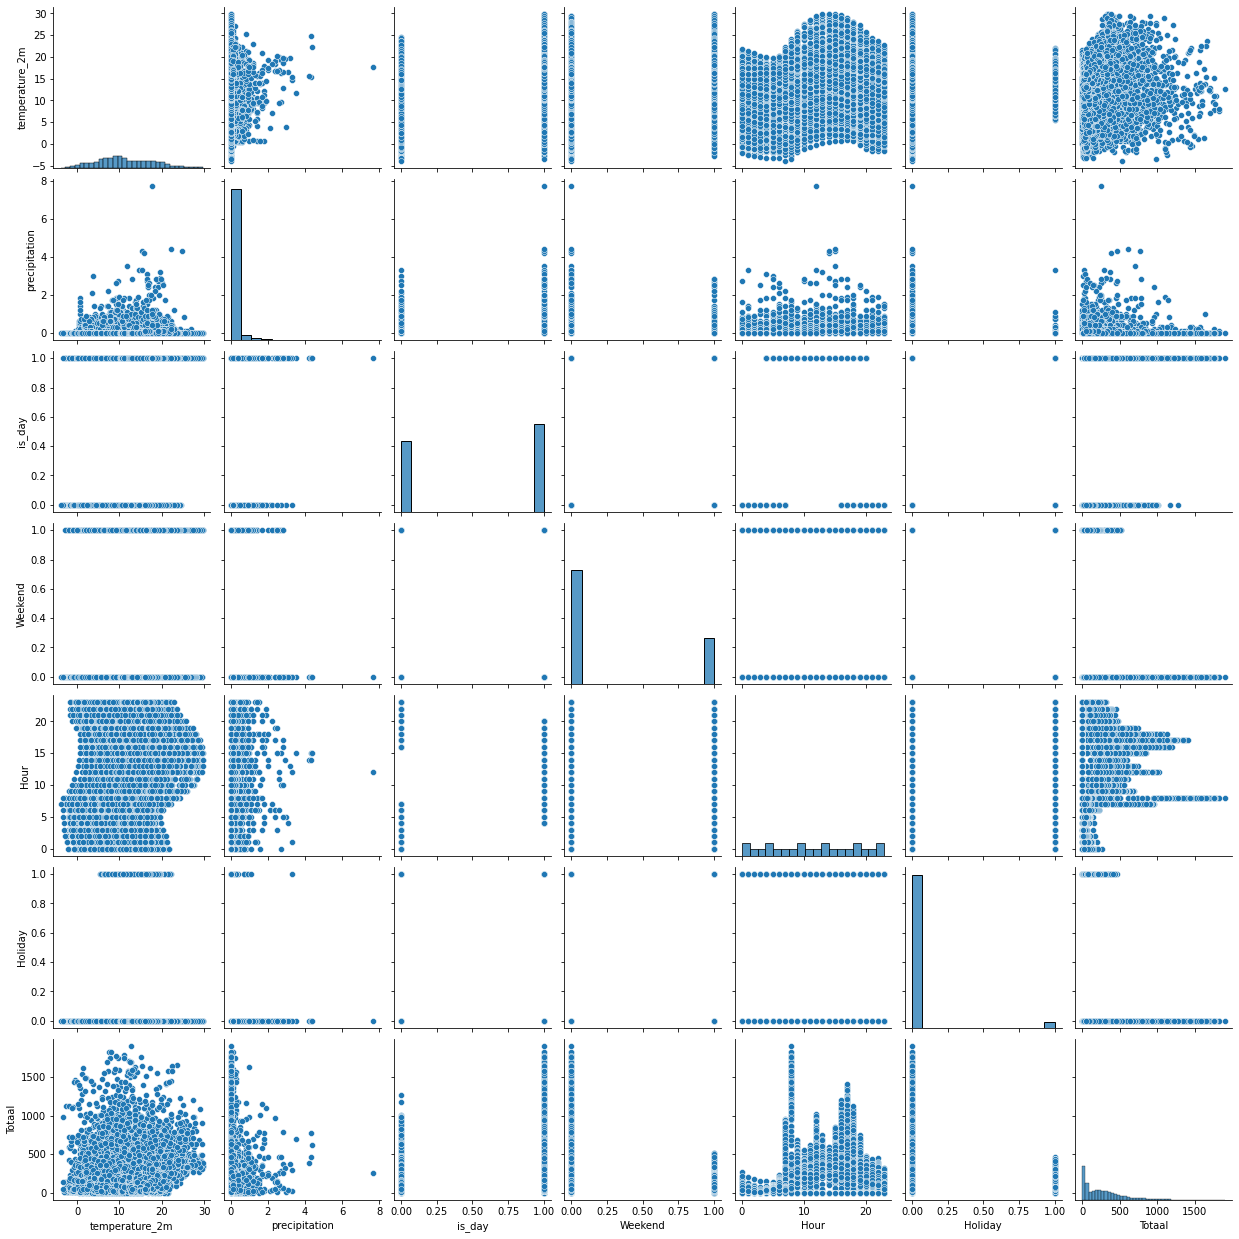

In [579]:
import seaborn as sns

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plot_features = ['temperature_2m', 'precipitation', 'is_day', 'Weekend', 'Hour', 'Holiday']
features = plot_features
print(features)
sns.pairplot(gold_data.loc[:,plot_features + ['Totaal']])

In [580]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

In [581]:
y_train = train_data["Totaal"]
#X0_train = np.ones((len(y_train),1))
#X_train = np.hstack((X0_train, train_data.loc[:, features]))
X_train = train_data.loc[:, features]

y_test = gtest_data["Totaal"]
#X0_test = np.ones((len(y_test),1))
#X_test = np.hstack((X0_test, gtest_data.loc[:, features]))
X_test = gtest_data.loc[:, features]

### Linear Regression

In [582]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

LinReg = make_pipeline(StandardScaler(), LinearRegression()) # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = LinReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

formula = 'Totaal ~ ' + '+'.join(features)
print(type(formula))

model = smf.ols(formula=formula, 
                data=train_data).fit()
  
# model summary 
print(model.summary()) 


Training set MSE: 64946.28148533453
Test set MSE: 36182.7372229044
Train set R²: 0.3575728758458452
Test set R²: -0.021266413630555148
<class 'str'>
                            OLS Regression Results                            
Dep. Variable:                 Totaal   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     402.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:59:50   Log-Likelihood:                -30226.
No. Observations:                4343   AIC:                         6.047e+04
Df Residuals:                    4336   BIC:                         6.051e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|  

### Poisson Regression

In [583]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score

PoiReg = make_pipeline(StandardScaler(), PoissonRegressor(alpha = 1, solver = "newton-cholesky")) # call an instance of the class LinearRegression

PoiReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = PoiReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = PoiReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 62287.282606543566
Test set MSE: 34892.6249557852
Train set R²: 0.3838748128276652
Test set R²: 0.015147313725251688


### Ridge Regression

In [584]:
from sklearn.linear_model import Ridge 

RidReg = make_pipeline(StandardScaler(), Ridge()) # call an instance of the class LinearRegression

RidReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RidReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = RidReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = RidReg.score(X_train, y_train) # Training set R²
R_test = RidReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 64946.28313622125
Test set MSE: 36178.783880537965
Train set R²: 0.3575728595158195
Test set R²: -0.02115482959655668


### Decision Tree Regression

In [585]:
from sklearn.tree import DecisionTreeRegressor

DTReg = DecisionTreeRegressor()

DTReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = DTReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = DTReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = DTReg.score(X_train, y_train) # Training set R²
R_test = DTReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 3602.8372860541886
Test set MSE: 47229.97703853047
Train set R²: 0.9643619258325391
Test set R²: -0.33307740011057274


### Random Forest Regression

In [586]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor()

RFReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RFReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = RFReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = RFReg.score(X_train, y_train) # Training set R²
R_test = RFReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 6769.816988329902
Test set MSE: 39898.169407033565
Train set R²: 0.9330352106479753
Test set R²: -0.12613537582093182


### Gradient Boosting Regression

In [632]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

GBReg = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss= 'huber',
                                                                  learning_rate = 0.013,
                                                                  criterion = 'friedman_mse', 
                                                                  n_estimators = 100,
                                                                  max_depth = 4,
                                                                  alpha = 0.9))

GBReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = GBReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = GBReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = GBReg.score(X_train, y_train) # Training set R²
R_test = GBReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 48263.659761049545
Test set MSE: 11963.97932787265
Train set R²: 0.5225918492585749
Test set R²: 0.6623138214874446


## Submission

### Prediction

In [633]:
#X0 = np.ones((len(test_data["Id"]),1))
#X = np.hstack((X0, test_data.loc[:, features]))

X = test_data.loc[:, features]

LinReg_predictions = LinReg.predict(X)
PoiReg_predictions = PoiReg.predict(X)
RidReg_predictions = RidReg.predict(X)
DTReg_predictions = DTReg.predict(X)
GBReg_predictions = GBReg.predict(X)

predictions = {"LinReg": LinReg_predictions, 
               "PoiReg": PoiReg_predictions, 
               "DTReg": DTReg_predictions, 
               "RidReg": RidReg_predictions,
               "GBReg": GBReg_predictions}

### Save results

In [634]:
# format predictions with Ids into dataframe and save to csv.

for model in predictions:
    file = pd.DataFrame([test_data["Id"], predictions[model]]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/" + model + ".csv", index = False)